In [3]:
!pip install transformers
!pip install sacremoses

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 18.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=38fb35e8855282bb357c786f8b6aedfb34931f01ea8c109c999bafed0f55309c
  Stored in directory: /root/.cache/pip/wheels/82/ab/9b/c15899bf659ba74f623ac776e861cf2eb8608c1825ddec66a4
Successfully built sacremoses


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder, StandardScaler

%matplotlib inline
from we import *

# Model initiate

In [5]:
flaubert, flaubert_tokenizer, log = initiate_model()

Some weights of the model checkpoint at flaubert/flaubert_small_cased were not used when initializing FlaubertModel: ['pred_layer.proj.weight', 'pred_layer.proj.bias']
- This IS expected if you are initializing FlaubertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing FlaubertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


#Analyse

There are polysemy in French, and their POS often changes with the meaning of the word.
We can divide polysemy into two types:

1 The pronunciation of words is the same, such as "devoir", which can be used as a NOUN or a VERB, and its pronunciation is the same.


2 words are pronounced differently: for example " content ", which can be used both as an ADJ and as a VERB( conjugation of the third-person plural of the verb "conter").

In addition, French also has some homonyms, which we can group into words that are spelled or pronounced the same but have different meanings.


1 Same spelling: “Mes fils ont cassé mes fils”. The first “fils” means whose children, the second refers to sewing thread. Pronunciation is different.


2 have the same pronunciation: "pian", "pin", the former is food and the latter is tree

We can identify sentences by their context, so how does the word vector representation explain this information?

The following will try to analyze the key factors affecting word vectors through some examples: singular and plural, gender, verb conjugation, pronunciation or POS, etc.

#Exemple 1


For the first example we will use the following homophone ： chair / chaire / cher / chère / chers.

All five words are pronounced the same, but "cher", "chère", "chers" share the same lexeme, "chère" "chers" are the feminine and plural forms of "cher" respectively.

We want to observe that when the pronunciation is the same, these word vectors are closer or words with the same pronunciation and the same stem are closer

In [6]:
homo=np.array(['chair', 'chaire', 'cher', 'chère', 'chers'])

In [7]:
homo_df = create_words_df(flaubert,flaubert_tokenizer, homo)
homo_df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
chair,2.406131,-4.021862,0.354357,-3.978417,3.968796,-1.922320,-2.429848,-1.442205,1.987993,-0.098205,...,-3.635274,0.231576,-0.811022,-3.477247,-3.843000,-7.289993,-1.759809,-3.626682,-2.814020,-3.821744
chaire,3.828559,-1.537604,1.312972,2.653167,-0.074649,-2.019754,-0.598114,-0.228226,2.791021,-4.066631,...,2.001046,-1.129883,1.164746,1.187619,4.861024,-1.469199,-6.339580,-0.080909,0.854378,-8.374445
cher,-2.160990,-1.576744,1.342763,0.140084,-1.468558,-4.870362,-4.892401,0.511340,0.459337,-3.532649,...,0.789880,2.017585,-1.311810,-2.558577,-0.281814,-2.999590,-2.707084,-5.634574,-1.383209,-1.324871
chère,-2.550533,-3.409812,2.225051,-2.075540,0.702713,-4.043069,-5.171730,-2.315339,-0.003951,-2.075631,...,1.480845,-1.950603,1.195558,-0.361401,-0.668593,-6.609531,-2.561314,-3.651665,-3.103512,-0.121145
chers,-3.681726,-4.590162,2.833697,3.142820,2.885209,-2.037085,-4.392685,-1.095508,-1.229092,-3.271080,...,-1.410145,1.608762,3.583933,0.088731,0.297132,-2.808261,-3.675452,-3.905116,-1.235882,-1.964571


In [8]:
homo_T = homo_df.T
homo_T.corr()

,chair,chaire,cher,chère,chers
chair,1.000000,0.451711,0.617993,0.606637,0.555549
chaire,0.451711,1.000000,0.536838,0.469243,0.462738
cher,0.617993,0.536838,1.000000,0.806355,0.801669
chère,0.606637,0.469243,0.806355,1.000000,0.764967
chers,0.555549,0.462738,0.801669,0.764967,1.000000


The following will compare the degree of correlation between word vectors through the correlation of data

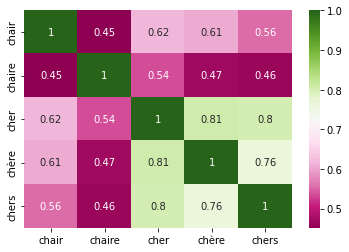

In [9]:
sns.heatmap(homo_T.corr(), cmap = 'PiYG', annot = True)

From the figure we can observe that the correlation coefficient of the word pair "cher": "chère"; "cher": "chers"; "chère": "chers" is relatively high while others are relatively low

Next, we will use PCA to reduce the word vector from 512 dimensions to 2 dimensions to observe which word vectors are closer in space

In [10]:
H = homo_df.iloc[:]
y=homo_T.columns
pca = PCA(n_components=2)
pca_h=pca.fit_transform(H)
pca_df_h = pd.DataFrame({'Xpca':pca_h[:,0],
                        'Ypca':pca_h[:,1],
                        'Cibles':y})
pca_df_h

,Xpca,Ypca,Cibles
0,-4.855370,51.758766,chair
1,61.967697,-8.904373,chaire
2,-17.476933,-16.653133,cher
3,-21.094046,-10.278963,chère
4,-18.541372,-15.922293,chers


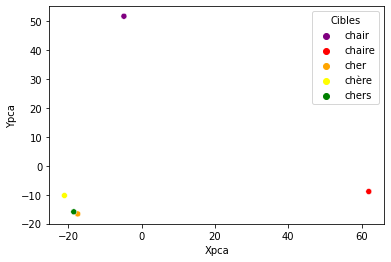

In [11]:
sns.scatterplot(x="Xpca", y="Ypca",
              hue="Cibles",
              palette=['purple','red','orange','yellow','green'],
              legend='full',
              data=pca_df_h);

From this figure, we can observe that word vectors of "cher", "chère", "chers" are very close， while "chair" and "chaire" are far away from these three words and have a large distance from each other

From the analysis of the above results, it seems that the same pronunciation of words does not make their word vectors close. Synonyms that have the same pronunciation and share the same stem have close word vectors



#Exemple 2


For the second example we will use the following words: ce / se / cette / ces / sa / son / ses. It contains homonym pairs "ce" and "se", "ces" and "ses". Also "cette" and "ces" share the same stem, which are the feminine and plural forms of "ce" respectively, and "sa" and "ses" are "son" feminine and plural forms of . We want to observe whether the word vector of a word is closer to its homonym or its synonym which genre （ingular plural, feminine and masculine） are differents.




In [13]:
cs=np.array(["ce", "se", 'cette','ces','sa','son','ses'])

In [14]:
cs_df = create_words_df(flaubert,flaubert_tokenizer, cs)
cs_df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
ce,0.314989,1.397647,0.657732,-0.695699,-0.872874,-1.852170,-5.376827,0.385355,-0.171705,-0.488816,...,1.916011,-1.602996,-1.235572,-5.264666,0.367328,-2.756374,-2.026827,-4.680243,-1.837075,-3.732684
se,-1.807790,-0.105152,-3.915969,3.257318,-0.499956,-1.303328,-1.163776,1.585167,2.234813,3.200969,...,-2.448903,2.136194,0.943816,-5.584003,2.854340,-3.927922,0.832821,-4.914937,-1.794468,-2.338717
cette,0.653544,0.822215,1.698080,-0.196646,0.401792,-6.208071,-5.139995,1.420808,3.562400,5.919995,...,1.075679,2.215290,-2.118201,-4.970945,-0.377359,-6.559789,-5.441738,-5.371158,-1.002217,-4.694568
ces,1.381961,1.676569,0.023313,-0.488263,0.416494,-4.719997,-3.468470,-1.634807,2.211374,2.057185,...,0.751108,2.444997,-0.565859,-2.830020,0.157947,-3.943423,-1.026368,-3.451233,-0.724448,-1.405168
sa,0.141941,1.930711,-3.402723,0.568273,0.315614,-4.563600,1.713090,3.325674,2.165889,1.284352,...,1.424294,-0.093632,-2.196224,-0.636605,-2.686443,-5.478354,-3.203216,-3.358542,1.449516,-6.741150
son,-1.371764,0.023384,-3.223059,-0.128714,1.743439,-5.050135,-2.566688,3.898433,2.324070,0.461078,...,-0.468681,-1.159612,0.185185,0.692381,-4.912081,-4.680734,-2.378970,-3.832991,-0.688007,-4.490879
ses,-0.728260,1.687275,-3.118967,-0.350729,0.958441,-6.063859,-0.483555,1.273539,3.634695,1.858521,...,-0.169241,-1.166299,-0.233148,-1.267716,-3.028750,-5.653637,-1.398645,-2.754372,3.364357,-2.650381


The following will compare the degree of correlation between word vectors through the correlation of data

In [15]:
cs_T = cs_df.T
cs_T.corr()

,ce,se,cette,ces,sa,son,ses
ce,1.000000,0.645214,0.877994,0.878611,0.680399,0.614460,0.595115
se,0.645214,1.000000,0.626696,0.680110,0.691863,0.593638,0.655359
cette,0.877994,0.626696,1.000000,0.893655,0.727760,0.637943,0.610708
ces,0.878611,0.680110,0.893655,1.000000,0.724465,0.629866,0.651264
sa,0.680399,0.691863,0.727760,0.724465,1.000000,0.891905,0.903812
son,0.614460,0.593638,0.637943,0.629866,0.891905,1.000000,0.887243
ses,0.595115,0.655359,0.610708,0.651264,0.903812,0.887243,1.000000


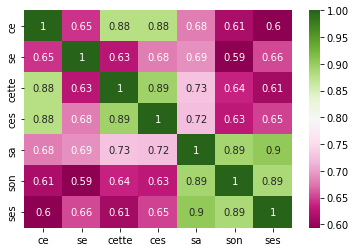

In [16]:
sns.heatmap(cs_T.corr(), cmap = 'PiYG', annot = True)

From this figure, we can observe that the word pairs with higher correlation coefficient are "ce" : "cette" ; "ce" : "ces"; "ette" : "ces"; "sa" : "son"; "sa" : "ses"; "son" : "ses".
Regarding the homophone pairs "ce" : "se", "ces" : "ses", their correlation coefficients are low

Next, we will use PCA to reduce the word vector from 512 dimensions to 2 dimensions to observe which word vectors are closer in space

In [19]:
CS = cs_df.iloc[:]
CS

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
ce,0.314989,1.397647,0.657732,-0.695699,-0.872874,-1.852170,-5.376827,0.385355,-0.171705,-0.488816,...,1.916011,-1.602996,-1.235572,-5.264666,0.367328,-2.756374,-2.026827,-4.680243,-1.837075,-3.732684
se,-1.807790,-0.105152,-3.915969,3.257318,-0.499956,-1.303328,-1.163776,1.585167,2.234813,3.200969,...,-2.448903,2.136194,0.943816,-5.584003,2.854340,-3.927922,0.832821,-4.914937,-1.794468,-2.338717
cette,0.653544,0.822215,1.698080,-0.196646,0.401792,-6.208071,-5.139995,1.420808,3.562400,5.919995,...,1.075679,2.215290,-2.118201,-4.970945,-0.377359,-6.559789,-5.441738,-5.371158,-1.002217,-4.694568
ces,1.381961,1.676569,0.023313,-0.488263,0.416494,-4.719997,-3.468470,-1.634807,2.211374,2.057185,...,0.751108,2.444997,-0.565859,-2.830020,0.157947,-3.943423,-1.026368,-3.451233,-0.724448,-1.405168
sa,0.141941,1.930711,-3.402723,0.568273,0.315614,-4.563600,1.713090,3.325674,2.165889,1.284352,...,1.424294,-0.093632,-2.196224,-0.636605,-2.686443,-5.478354,-3.203216,-3.358542,1.449516,-6.741150
son,-1.371764,0.023384,-3.223059,-0.128714,1.743439,-5.050135,-2.566688,3.898433,2.324070,0.461078,...,-0.468681,-1.159612,0.185185,0.692381,-4.912081,-4.680734,-2.378970,-3.832991,-0.688007,-4.490879
ses,-0.728260,1.687275,-3.118967,-0.350729,0.958441,-6.063859,-0.483555,1.273539,3.634695,1.858521,...,-0.169241,-1.166299,-0.233148,-1.267716,-3.028750,-5.653637,-1.398645,-2.754372,3.364357,-2.650381


In [20]:
y=cs_T.columns
pca = PCA(n_components=2)
pca_cs=pca.fit_transform(CS)
pca_df_cs = pd.DataFrame({'Xpca':pca_cs[:,0],
                        'Ypca':pca_cs[:,1],
                        'Cibles':y})
pca_df_cs

,Xpca,Ypca,Cibles
0,-29.352236,-2.745688,ce
1,2.724203,47.797428,se
2,-33.448631,-13.892663,cette
3,-31.158983,-4.280976,ces
4,24.537848,-8.837996,sa
5,32.320595,-13.688003,son
6,34.377209,-4.352126,ses


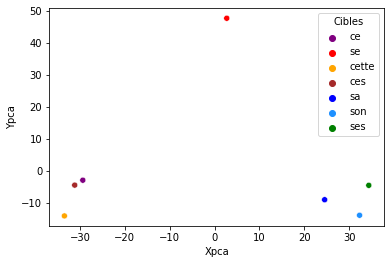

In [21]:
sns.scatterplot(x="Xpca", y="Ypca",
              hue="Cibles",
              palette=['purple','red','orange','brown','blue',
                       'dodgerblue','green'],
              legend='full',
              data=pca_df_cs);

From the figure we can observe that the words "ce", "cette" and "ces" are relatively close,
"son", "sa", "ses" are relatively close, only "se" is further away from other words

From the results of the above analysis, it seems that the vector of a word will be closer to its synonymous word than its homonym

#Exemple 3

In the following analysis, we will use the words "lire", "lit", 'lis','lisons', 'lisez', 'lisent', 'lits'. The first 7 words are verbs "lire"  and their conjugation of present tense , including "lit", which is both the conjugation of third-person singular of "lire" and a singular noun, and the last word above is the plur form of noun "lit".

We want to analyze whether "lit" is closer to the conjugated verb of "lire" or the plural noun "lits".

In [23]:
l_form=np.array(['lire', 'lit', 'lis','lisez', 'lisons','lisent','lits' ])

In [24]:
l_form_df = create_words_df(flaubert,flaubert_tokenizer, l_form)
l_form_df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
lire,0.318712,-1.519081,1.559426,1.186756,-4.629498,-5.029236,2.303784,1.996876,2.171612,-1.285269,...,3.044061,-0.729305,2.310766,0.205358,-1.756253,-3.763788,-4.154531,-5.986154,5.824565,-3.056911
lit,5.419025,-3.190314,1.037061,-2.160197,-1.961483,-3.842440,-0.957800,2.432615,1.689540,1.020191,...,-4.659591,1.591881,6.809301,5.216158,-0.777971,-4.506973,-5.642638,3.263410,5.659391,4.899048
lis,2.971252,3.032865,0.258659,-2.986819,-2.516394,-4.142464,-1.099549,-3.360127,-0.282288,-1.893257,...,-0.467532,-2.017552,3.964330,-4.687535,-0.078630,-3.319971,-4.191174,-2.780843,4.165537,2.802788
lisez,9.405848,3.616372,-0.943479,3.268529,-1.815138,-0.303723,1.151191,4.542108,6.355762,-1.248838,...,3.198631,4.562910,4.437338,0.298656,-0.670235,-0.597170,-2.934008,-4.733320,5.879202,-4.148338
lisent,4.457831,1.488073,-0.031325,3.699459,-4.039843,-3.857496,2.161697,1.171414,1.737066,2.438358,...,-1.710455,-0.514687,-1.182517,0.802137,0.483862,-3.376148,-5.168536,-7.293436,2.337662,3.262433
lits,5.725349,-1.968119,0.176517,-1.601459,-0.947848,-4.727447,-1.694796,0.698478,0.803264,-0.663272,...,-4.171799,3.384409,5.552233,5.843635,2.460096,-1.687626,-4.033846,2.699845,8.102873,3.800328


Next w'll use the correlation of data

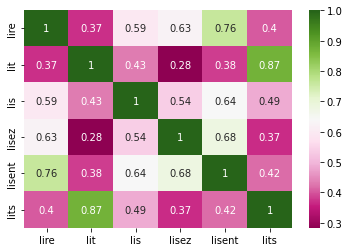

In [25]:
l_form_T = l_form_df.T
sns.heatmap(l_form_T.corr(), cmap = 'PiYG', annot = True)

From this figure, we can observe that the word pairs with higher correlation coefficient are "lit" : "lits" ;  "lire" : "lisent" ; " lisez" : " lisent" .
The correlation coefficients of other words are relatively low。

Next w'll use PCA

In [26]:
L = l_form_df.iloc[:]
y=l_form_T.columns
pca = PCA(n_components=2)
pca_l=pca.fit_transform(L)
pca_df_l = pd.DataFrame({'Xpca':pca_l[:,0],
                        'Ypca':pca_l[:,1],
                        'Cibles':y})
pca_df_l

,Xpca,Ypca,Cibles
0,-29.200500,-20.449459,lire
1,57.622921,0.081812,lit
2,-8.288459,-16.857433,lis
3,-35.448708,45.343254,lisez
4,-35.001892,-14.935416,lisent
5,50.316647,6.817256,lits


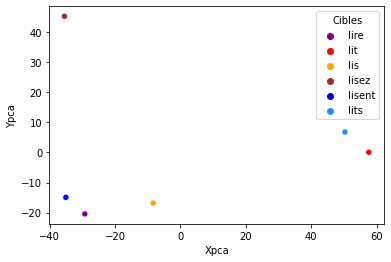

In [27]:
sns.scatterplot(x="Xpca", y="Ypca",
              hue="Cibles",
              palette=['purple','red','orange','brown','blue',
                       'dodgerblue'],
              legend='full',
              data=pca_df_l);

From the figure we can observe that the words "lit", "lits" are close and  "lisent", "lire" , "lis"" are relatively close,
"lisez" is  away from other words

From the above results, "lit" is closer to the plural noun "lits", that is to say, its word vector is more biased towards nouns than verbs.

#Exemple 4

Another exemple similar with Exemple 3 , and w'll see if they have the same result.

The words will use:
devoir / dois / doit / devons / devez / doivent / devoirs / du / dû / due / dues.

theses words contains

conjugation of verbe "devoir":  dois / doit / devons / devez / doivent / dû 

"devoir" can be  a verbe and noun. "devoirs" is the plur form of "devoir"

dû/ due / dues share the same stem "dû", "due" feminine singular，"dues" feminine plur.




In [39]:
d_form=np.array(['devoir','dois', 'doit','devons','devez','doivent','devoirs','dû', 'due','dues'])

In [40]:
d_form_df = create_words_df(flaubert,flaubert_tokenizer, d_form)
d_form_df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
devoir,-3.042995,-2.632901,3.047055,-1.649569,1.106546,3.882486,-4.529127,-4.038092,-0.205113,-3.582548,...,2.137133,-1.953053,-0.907473,-2.134691,1.080746,-4.361495,-3.335456,-3.091559,0.003049,-1.671548
dois,-0.272257,-2.383288,-3.820485,-1.642292,4.097638,-4.501349,-5.579881,-4.134065,-2.394282,-2.160791,...,-1.715626,2.803551,2.369069,-3.770561,0.818722,-5.784181,-3.870961,-4.032903,-1.228122,-3.678701
doit,2.845254,-1.745804,1.146219,-4.975302,1.748681,-2.025762,-1.920117,0.388370,-2.147606,-0.204851,...,1.204849,1.471419,-4.076154,-1.989743,-0.401322,-2.755810,-1.496190,-6.879403,-2.207952,-5.743422
devons,1.649519,-3.020716,2.382568,-4.320519,4.172297,0.726942,-1.935441,-0.471330,0.056175,0.294054,...,2.352674,0.918916,-2.381407,-5.170003,-0.212264,-5.871082,-2.951383,-10.753531,-5.172078,-3.061379
devez,3.936928,-0.164600,-0.218853,0.297288,4.001000,2.566275,-7.156226,1.764069,1.022085,-0.020342,...,3.107648,3.983540,1.750179,-1.309569,-0.724071,-5.096099,0.287739,-5.322020,-1.143467,-8.694607
doivent,3.826965,-1.419238,1.336295,-5.989023,1.071502,-2.673814,-3.605027,0.464079,-0.211268,2.529543,...,1.968109,3.213804,-3.499495,-1.710779,0.399049,-4.550164,-0.510260,-6.363135,-3.672789,-5.289960
devoirs,-0.347132,-1.650851,2.435846,1.165221,1.698622,-0.659882,-1.125703,-1.592316,-3.871907,-4.719678,...,0.947881,-1.096101,1.235841,-4.763198,2.563816,-1.493783,-1.770330,-3.307070,0.435365,-2.074388
dû,4.721836,-3.455255,5.229387,-1.877830,2.386677,-3.421945,-5.440487,1.903399,3.200207,-1.294195,...,-2.393702,1.940191,0.685519,-0.086435,2.789603,-7.559228,-4.254838,-4.146300,1.701212,-6.536662
due,5.640455,-1.782599,0.186268,0.200730,6.142800,-3.189517,-0.332399,-1.170257,3.312728,-3.270341,...,-6.227378,5.269942,3.438557,1.924471,1.322770,-3.081623,-0.153915,-3.956677,3.652068,-5.926049
dues,1.982193,-2.522709,0.532606,-0.984779,7.896857,-4.564006,-3.911145,0.811275,1.659437,-4.324465,...,-5.062907,3.936453,2.384391,1.998286,2.276670,-3.209389,-0.791010,-4.930552,0.881000,-3.854840


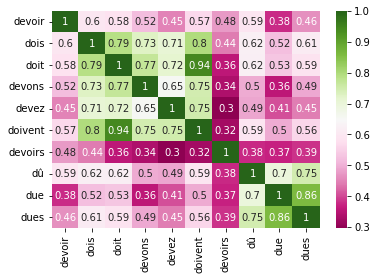

In [41]:
d_form_T = d_form_df.T
d_form_T.corr()
sns.heatmap(d_form_T.corr(), cmap = 'PiYG', annot = True)

The high correlation entre word pair  "doit", " doivent" ; "dois" : " doivent" ; " doit" : " dois" ; "dû": "due"; "dû" : "dues"; "due" : "dues"; etc.

but we see that "devoir" is nether have high correlation with  "devoirs" nor the conjugation of verbe.


In [42]:
D = d_form_df.iloc[:]
y=d_form_T.columns
pca = PCA(n_components=2)
pca_d=pca.fit_transform(D)
pca_df_d = pd.DataFrame({'Xpca':pca_d[:,0],
                        'Ypca':pca_d[:,1],
                        'Cibles':y})
pca_df_d

,Xpca,Ypca,Cibles
0,6.001801,29.719284,devoir
1,-15.512937,1.447448,dois
2,-27.965260,-11.661864,doit
3,-29.543474,6.320965,devons
4,-33.576900,-3.711426,devez
5,-34.996559,-14.217017,doivent
6,27.035019,56.818306,devoirs
7,26.615093,-14.658439,dû
8,45.199196,-26.505196,due
9,36.743999,-23.552090,dues


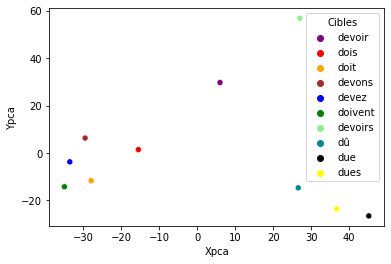

In [45]:
sns.scatterplot(x="Xpca", y="Ypca",
              hue="Cibles",
              palette=['purple','red','orange','brown','blue',
                       'green','lightgreen','darkcyan', 'black','yellow'],
              legend='full',
              data=pca_df_d);

From the result show, "dû", "due", "dues" are close, "dois","doit", "doivent", "devons" are close. "devoir" is nether close the conjugation of verb nor "devoirs".



Different from the results of the above examples, "devoir" is not close to verbs or nouns, so there should be other factors affecting the word vector of the homograph objection "devoir".

From the result of "dû", "due", "dues", we can conclude that the word vectors of the words which share the same stem and have the same POS are close.

#Exemple 5


For the follow example we will use the following words: content / contente / contents/ contentement / heureux / heureuse / heureusement / joie / joyeux / joyeuse / joyeusement.

"content","heureux" et "joyeux" are synonyme which are also the lexeme of others words.

content: contente(adj feminine), contents(adj plural),contentement(adv).

joyeux: joyeuse(adj feminine), joie(noun sigulier), joyeusement(adv).

heureux: heureuse((adj feminine), heuresement(adv).


We want to observe whether words with the same stem will be closer in these words,(like "heureux", "heureuse" and "heureusement""),  or synonyms with the same POS, singular and plural, and the same gender will be closer (like "content", "heureux" and "joyeux"





In [28]:
syn=np.array(['content','contente','contents' 'contentement','heureux', 'heureuse', 'heureusement','joie','joyeux','joyeuse','joyeusement' ])

In [29]:
syn_df = create_words_df(flaubert,flaubert_tokenizer, syn)
syn_df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
content,-2.834140,-2.291124,-0.814240,-0.960012,-1.266700,-0.736971,-2.899258,-0.684121,-3.680620,-0.784524,...,-0.478978,0.892824,-1.691512,-1.740508,0.275388,-5.585860,-4.374914,-6.429029,-1.870059,-4.137391
contente,-0.998772,-0.499648,-3.501166,1.488822,0.796206,-3.833579,-3.216204,-1.660275,-2.533755,-0.374102,...,-2.392442,1.408292,2.155056,-1.961049,-3.246433,-7.013612,-5.523893,-7.050172,-1.134257,-1.974446
heureux,-0.499049,-1.883030,0.593587,4.317543,2.972413,-4.881175,-1.487456,3.355628,1.378342,0.314815,...,-3.937634,-0.521656,-1.523520,-4.666160,-0.907671,-5.850927,-4.924458,-5.174964,-0.030757,-1.542950
heureuse,3.345748,-2.494368,1.351486,2.201735,5.043519,-1.730727,-4.065651,-0.052151,1.731328,0.709300,...,-2.116560,0.132924,1.521839,-3.945137,-2.151635,-7.203866,-2.480868,-0.625113,-0.888722,1.417496
heureusement,2.405712,-1.274648,-2.698919,2.689713,3.727092,-7.569973,-6.673074,4.658960,-2.634100,-1.124946,...,-3.586707,0.777858,1.350030,-1.248499,1.268077,-4.691904,-2.836432,-7.676985,1.204618,-3.049164
joie,1.873970,0.849752,-0.428439,-3.603074,1.772434,-2.046000,-1.177037,-2.016155,3.305992,0.571539,...,1.326041,-0.578604,1.903780,-3.847467,-1.857573,-6.796958,-2.441836,-3.442713,2.860240,-4.507409
joyeux,-0.652504,-2.764808,-0.587803,-3.562570,5.082630,-0.946760,-2.930682,-2.138238,-0.468557,1.937881,...,-1.975477,-4.877076,3.808104,-1.289336,0.906277,-2.044311,-1.163344,0.790351,-3.031649,-0.058698
joyeuse,-0.165344,-3.195284,-0.439440,-4.363452,6.688011,-2.052051,-3.684670,-0.645562,3.905782,5.554890,...,-2.164354,0.567858,3.063595,-1.052241,-2.187325,-3.368610,-1.988603,0.965237,-2.748142,-0.425446
joyeusement,0.690902,0.214455,-2.650821,2.469346,3.690255,-0.009243,-0.811242,-0.507748,4.275239,1.415767,...,-3.193432,-1.140727,2.032425,-2.706281,0.428296,-1.877499,-3.448930,-2.206454,-4.124567,-1.002560


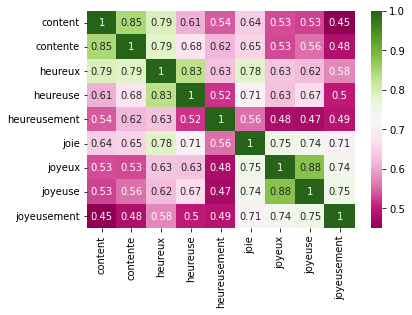

In [30]:
syn_T = syn_df.T
sns.heatmap(syn_T.corr(), cmap = 'PiYG', annot = True)

From the above figure, we see that the word pairs with the highest correlation coefficient are "content" : "contente"; "heureux" : "heureuse" ; "joyeux" : "joyeuse" 

Next is:
"content" : "heureux"; "contente" : "heureux"; "joie" : "heureux"; "joie" : " heurese" ; "joie" : " joyeux" ; " joie" : " joyeuse" ; "joie" :  "joyeusement".

The correlation coefficients for the following word pairs are not high
"heureux" : "heuresement"; "heureuse": "heureusemet"



Next we see the result of PCA

In [32]:
S = syn_df.iloc[:]
y=syn_T.columns
pca = PCA(n_components=2)
pca_s=pca.fit_transform(S)
pca_df_s = pd.DataFrame({'Xpca':pca_s[:,0],
                        'Ypca':pca_s[:,1],
                        'Cibles':y})
pca_df_s

,Xpca,Ypca,Cibles
0,-33.848137,-12.572240,content
1,-34.531330,-5.005930,contente
2,-22.379570,-13.445299,heureux
3,-7.330568,-18.465754,heureuse
4,-18.446175,56.718147,heureusement
5,11.833836,-9.478377,joie
6,33.843349,-4.244853,joyeux
7,33.259624,-5.347772,joyeuse
8,37.598980,11.842107,joyeusement


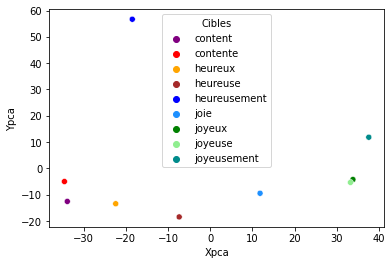

In [33]:
sns.scatterplot(x="Xpca", y="Ypca",
              hue="Cibles",
              palette=['purple','red','orange','brown','blue',
                       'dodgerblue','green','lightgreen','darkcyan'],
              legend='full',
              data=pca_df_s);

From the picture above, it can be seen "joyeux", "joyeuse"  are very close, and then "content" and " contente" are also close, then "heureux" and " heureuse", for the others words, they are relatively far away.

From the above analysis, it can be concluded that the word vectors of the words which share the same stem  and have the same POS are the closest, and the word vectors of words with the same stem but different POS are not close. 
